## import

In [1]:
import pickle
import re
import numpy as np
import pandas as pd
from adjustText import adjust_text # library for automatic adjust annotation text in matplotlib plots
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [2]:
## param for legend presentation of matplotlib
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

### pickle files

In [3]:
f_Nodes= open('./Nodes.dbm','rb')
f_Concepts= open('./ConceptsStr.dbm','rb')
f_perepick= open('./PeresDeConcepts.dbm','rb')
f_filspick= open('./FilsDeConcepts.dbm','rb')
f_atteqpick= open('./AttEquivalents.dbm','rb')
f_objeqpick= open('./ObjEquivalents.dbm','rb')
f_AttPereInit= open('./AttPeresImmediats.dbm','rb')
f_AttPereTransitive= open('./AttPereFermTransitive.dbm','rb')
f_ListePaires= open('./ListeDesPaires.dbm','rb')
f_AttOcc= open('./OccurenceDesAttributs.dbm','rb')
f_dotDict= open('./dotDict.dbm','rb')

Nodes=pickle.load(f_Nodes)
Concepts=pickle.load(f_Concepts)
pere1=pickle.load(f_perepick)
fils= pickle.load(f_filspick)
EquiAtt=pickle.load(f_atteqpick)
EquiObj= pickle.load(f_objeqpick)
pereimmediat= pickle.load(f_AttPereInit)
pere= pickle.load(f_AttPereTransitive)
PairFullList= pickle.load(f_ListePaires)
Att_cpt=pickle.load(f_AttOcc)
dotDict=pickle.load(f_dotDict)
#print(Att_cpt)

## Concept analysis

In [4]:
concept_intents_dict=dict()
for i in range(len(Nodes)):
    concept_intents_dict[str('c')+str(i)] = [int(Nodes[str(i)][0]), len(Nodes[str(i)][2]), 
                                             int(int(Nodes[str(i)][0])-len(Nodes[str(i)][2])),int(Nodes[str(i)][1])] #['all','local','inherited',extent]

## create dataframe    
df=pd.DataFrame.from_dict(concept_intents_dict, orient='index',columns=['Number of total attributes', 'Number of local attributes', 'Number of inherited attributes', 'Number of extents'])
#df
#df.describe()
#df.sum()

#### total intent

In [6]:
## count computation
total_intents_dict=dict()
for i in range(1,323):
    total_intents_dict[i] = len(df.loc[(df['Number of total attributes'] == i)])
    
df1=pd.DataFrame.from_dict(total_intents_dict, orient='index',columns=['Number_of_intents'])
## remove rows with 0 as values#df1[df1.Number_of_intents != 0] #df1.plot(kind='bar', color='red', figsize=(20,10))
df1 = df1[df1.Number_of_intents != 0]

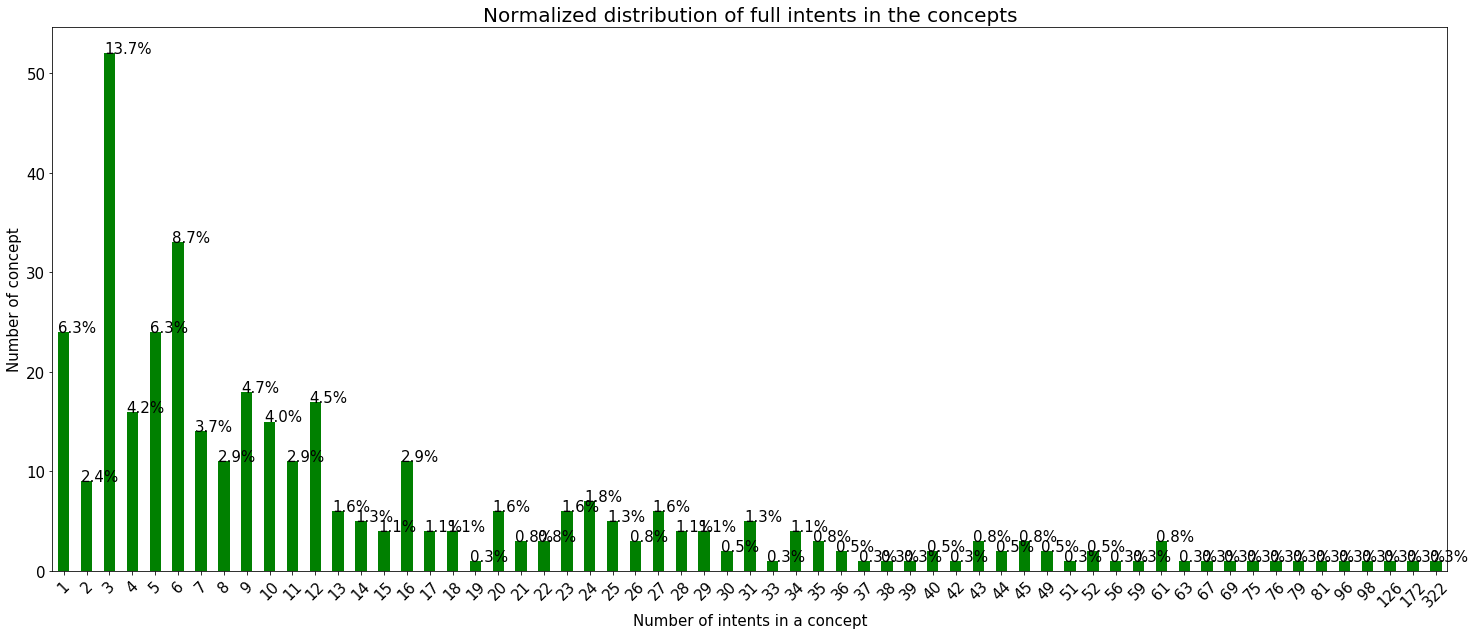

In [7]:
## visualization
ax=df1.plot(kind='bar', color='green', figsize=(25,10), fontsize=15, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Number of intents in a concept', fontsize=15)
plt.ylabel('Number of concept', fontsize=15)
#ax.set_xticklabels(df1['Number_of_intents'].tolist(), rotation = 45, ha="right")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()/total*100)
    x = p.get_x() + p.get_width()/200
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=15)
    #ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()/), fontsize=12, color='red', ha='center', va='bottom')
plt.title('Normalized distribution of full intents in the concepts', fontsize=20)
plt.savefig('num_full_intents_in_concept.png')

### local intent

In [8]:
## count computation
local_intents_dict=dict()
for i in range(0,273):
    local_intents_dict[i] = len(df.loc[(df['Number of local attributes'] == i)])
    
df2=pd.DataFrame.from_dict(local_intents_dict, orient='index',columns=['Number_of_local_intents'])
df2 = df2[df2.Number_of_local_intents != 0]

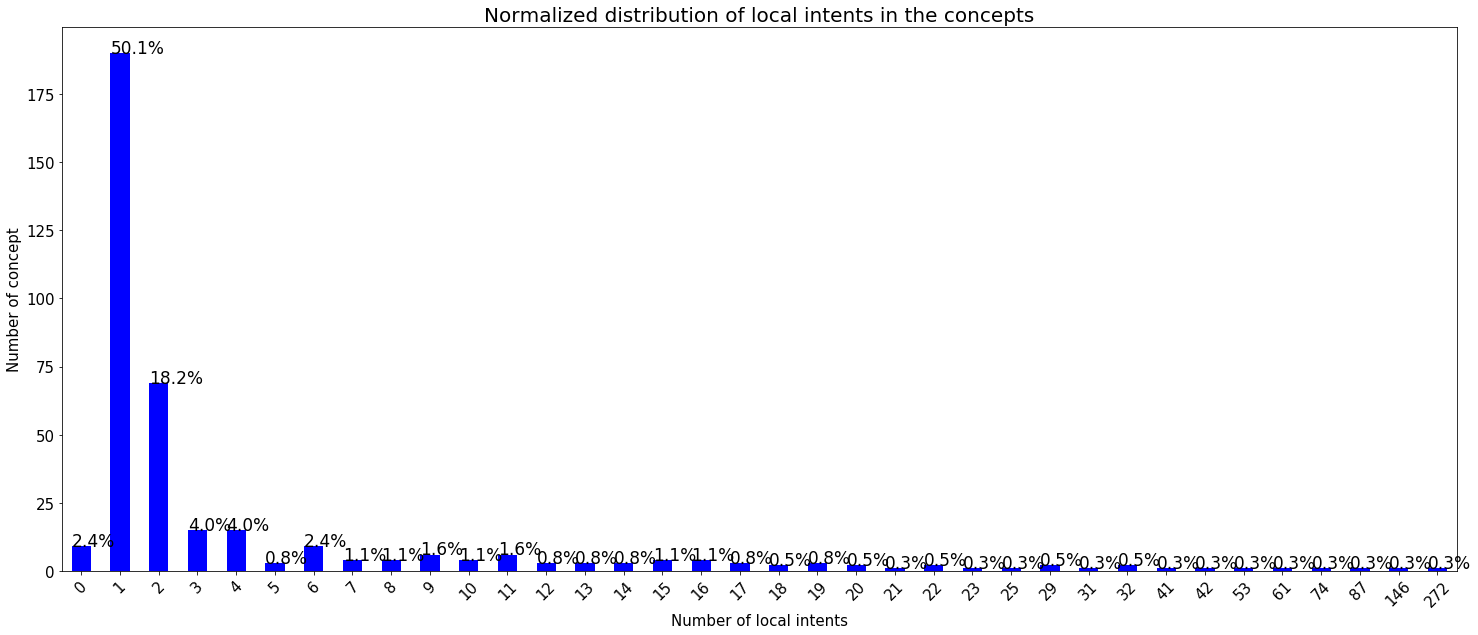

In [9]:
## visualization
ax=df2.plot(kind='bar', color='blue', figsize=(25,10), fontsize=15, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Number of local intents', fontsize=15)
plt.ylabel('Number of concept', fontsize=15)
#ax.set_xticklabels(df1['Number_of_intents'].tolist(), rotation = 45, ha="right")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()/total*100)
    x = p.get_x() + p.get_width()/200
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=17)
    #ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()/), fontsize=12, color='red', ha='center', va='bottom')
plt.title('Normalized distribution of local intents in the concepts', fontsize=20)
plt.savefig('num_local_intents_in_concept.png')

### inherited intent

In [10]:
## count computation
inherited_intents_dict=dict()
for i in range(0,53):
    inherited_intents_dict[i] = len(df.loc[(df['Number of inherited attributes'] == i)])
    
df3=pd.DataFrame.from_dict(inherited_intents_dict, orient='index',columns=['Number_of_inherited_intents'])
df3 = df3[df3.Number_of_inherited_intents != 0]

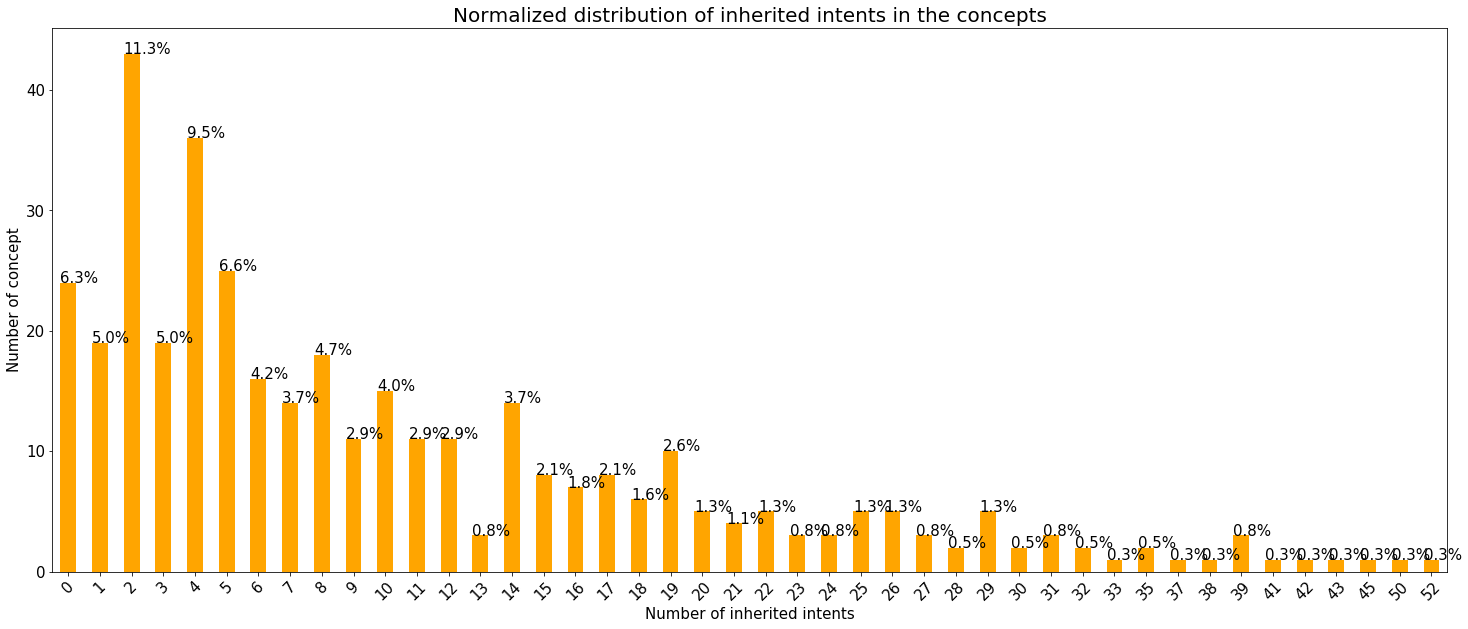

In [11]:
## visualization
ax=df3.plot(kind='bar', color='orange', figsize=(25,10), fontsize=15, legend=False)
plt.xticks(rotation=45)
plt.xlabel('Number of inherited intents', fontsize=15)
plt.ylabel('Number of concept', fontsize=15)
#ax.set_xticklabels(df1['Number_of_intents'].tolist(), rotation = 45, ha="right")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()/total*100)
    x = p.get_x() + p.get_width()/200
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=15)
    #ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()/), fontsize=12, color='red', ha='center', va='bottom')
    
plt.title('Normalized distribution of inherited intents in the concepts', fontsize=20)
plt.savefig('num_inherited_intents_in_concept.png')

### find single RST or ARG and mathcing pair in each concept

In [12]:
## build counter dictionary
# format -> {c33:[num_a, num_r, num_p]}
c_i_dict=dict() 
for k,v in Nodes.items():
    #matching string
    arg = re.compile("^a\d*")
    rst = re.compile("^r\d*")
    pair = re.compile("^\(.*")
    #counter
    a=0
    r=0
    p=0
    #loop of intents in a concept
    for rel in v[6]:
        #condition
        if arg.match(str(rel)):a+=1
        elif rst.match(str(rel)):r+=1
        elif pair.match(str(rel)):p+=1
        #store in a dict
        c_i_dict[str('c')+str(k)] = [a,r,p]

#c_i_dict['c0']
#[37, 26, 18]

In [13]:
## make dataframe
cdf=pd.DataFrame.from_dict(c_i_dict, orient='index',columns=['Number of arg relation', 'Number of rst relation', 'Number of pair relation'])
#cdf
#cdf.describe()
#cdf.sum()

In [14]:
arg_r_dict=dict()
for i in range(0,111): 
    arg_r_dict[i] = len(cdf.loc[(cdf['Number of arg relation'] == i)])
cdf1=pd.DataFrame.from_dict(arg_r_dict, orient='index',columns=['Percentage_of_arg_relations'])

rst_r_ls=[]
for i in range(0,111):
    rst_r_ls.append(len(cdf.loc[(cdf['Number of rst relation'] == i)]))
cdf1['Percentage_of_rst_relations']=rst_r_ls

pair_r_ls=[]
for i in range(0,103):
    pair_r_ls.append(len(cdf.loc[(cdf['Number of pair relation'] == i)]))
for i in range(111-102-1):pair_r_ls.append(0)
cdf1['Percentage_of_pair_relations']=pair_r_ls

#remove all-0 rows
cdf1 = cdf1[(cdf1.T != 0).any()]

# normalization for percentage presentation
cdf1['Percentage_of_arg_relations'] = cdf1['Percentage_of_arg_relations'] / (cdf1['Percentage_of_arg_relations'].sum())
cdf1['Percentage_of_rst_relations'] = cdf1['Percentage_of_rst_relations'] / (cdf1['Percentage_of_rst_relations'].sum())
cdf1['Percentage_of_pair_relations'] = cdf1['Percentage_of_pair_relations'] / (cdf1['Percentage_of_pair_relations'].sum())
#cdf1

325

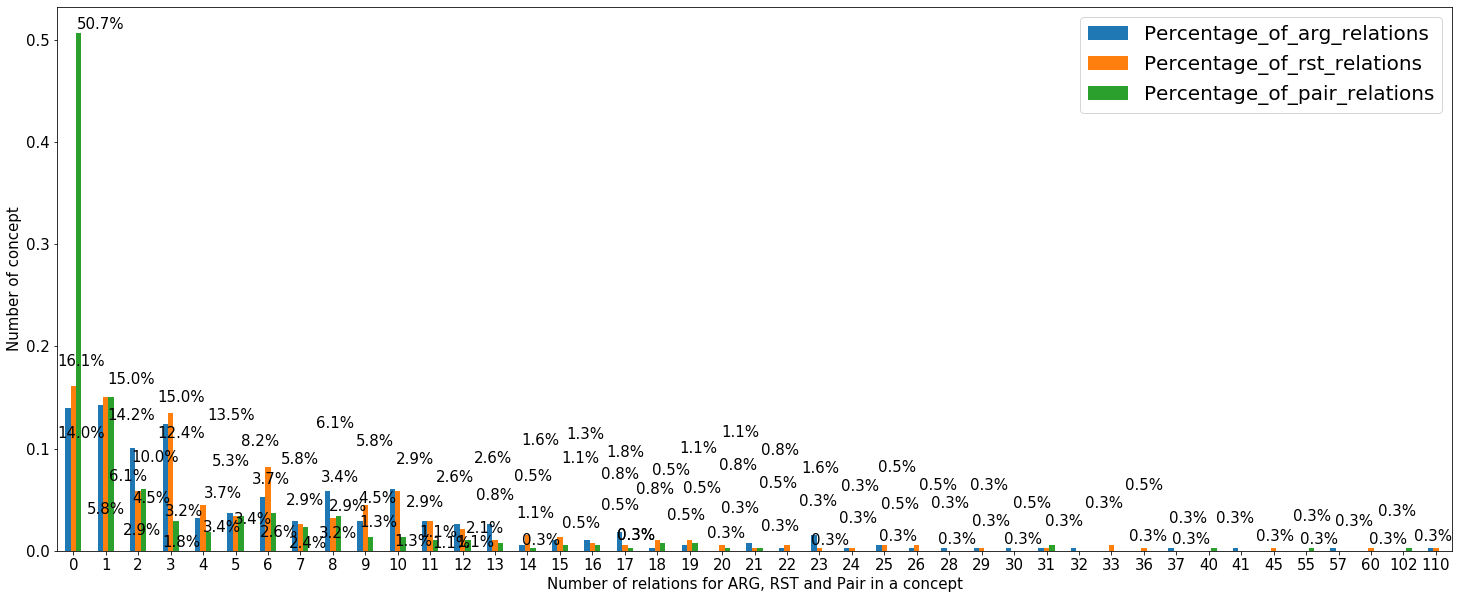

In [15]:
## visualization
ax=cdf1.plot(kind='bar',  figsize=(25,10), fontsize=15, legend=True)
plt.xticks(rotation=360)
plt.xlabel('Number of relations for ARG, RST and Pair in a concept', fontsize=15)
plt.ylabel('Number of concept', fontsize=15)

texts = [plt.text(p.get_x() + p.get_width()/200, p.get_height(), '{:.1f}%'.format(p.get_height()*100), fontsize=15) for p in ax.patches if (p.get_height()/total*100) !=0 ]
adjust_text(texts)

#plt.title('Distribution of relations and/or pairs in the concepts', fontsize=20)
#plt.savefig('num_rel_in_concept.png')

## Attribute analysis

In [16]:
attribute_relation_dict=dict()
for k,v in dotDict.items():
    attribute_relation_dict[k] = len(dotDict[k][1])
    
#len(attribute_relation_dict)

In [17]:
adf=pd.DataFrame.from_dict(attribute_relation_dict, orient='index',columns=['Number of relations in the attributes'])
adf.sort_index(ascending=True)
#adf.describe() 
#ARG 1242+1(a0) + RST 2462+1(r0)

,Number of relations in the attributes
a0,1
a1,1
a10,3
a100,3
a1000,4
...,...
r995,5
r996,5
r997,5
r998,5


In [18]:
## rst
rst_df=adf.loc['r0':'r2462'] #2463
rel_in_attribute_dict=dict()
# rst_df.describe()
for i in range(1,16):
    rel_in_attribute_dict[i] = len(rst_df.loc[(rst_df['Number of relations in the attributes'] == i)])
rst_df1=pd.DataFrame.from_dict(rel_in_attribute_dict, orient='index',columns=['Percentage_of_relations_in_RST_attributes'])
#rst_df1

## arg
arg_df=adf.loc['a0':'a1242'] #1243
rel_in_attribute_dict=dict()
# arg_df.describe()
for i in range(1,16):
    rel_in_attribute_dict[i] = len(arg_df.loc[(arg_df['Number of relations in the attributes'] == i)])
arg_df1=pd.DataFrame.from_dict(rel_in_attribute_dict, orient='index',columns=['Percentage_of_relations_in_ARG_attributes'])
#arg_df1

## combine rst+arge both two dataframes
result = pd.concat([arg_df1, rst_df1], axis=1, sort=False)
#result.describe()
#result.cumsum()

6

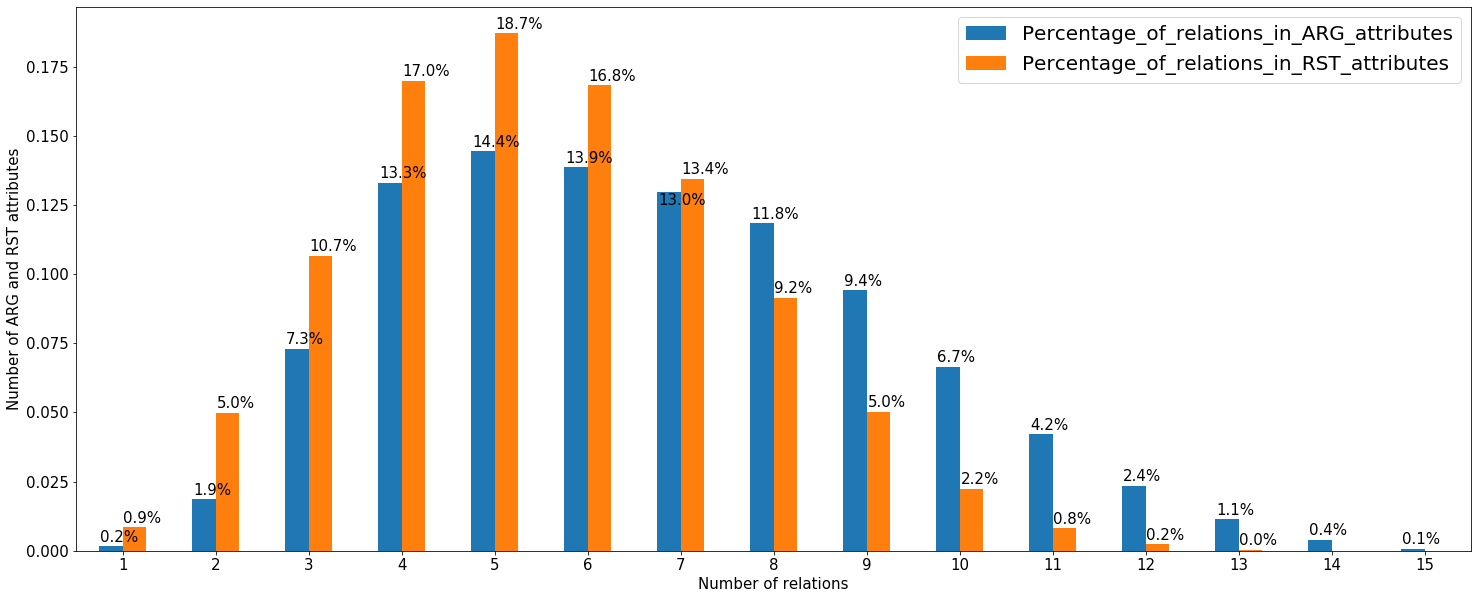

In [19]:
## normalization for percentage representation
result['Percentage_of_relations_in_ARG_attributes'] = result['Percentage_of_relations_in_ARG_attributes'] / (result['Percentage_of_relations_in_ARG_attributes'].sum())
result['Percentage_of_relations_in_RST_attributes'] = result['Percentage_of_relations_in_RST_attributes'] / (result['Percentage_of_relations_in_RST_attributes'].sum())

## visualization
ax=result.plot(kind='bar',  figsize=(25,10), fontsize=15, legend=True)
plt.xticks(rotation=360)
plt.xlabel('Number of relations', fontsize=15)
plt.ylabel('Number of ARG and RST attributes', fontsize=15)
#totals = []
#for i in ax.patches:
#    totals.append(i.get_height())
#total = sum(totals)
#with_hue(ax, result.Number_of_relations_in_ARG_attributes, 15, 2)

#for p in ax.patches:
 #   ax.annotate('{:.1f}%'.format(p.get_height()/total*100), 
  #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
   #                ha = 'center', va = 'center', 
    #               size=15,
     #              xytext = (0, -12), 
      #             textcoords = 'offset points')

texts = [plt.text(p.get_x() + p.get_width()/200, p.get_height(), '{:.1f}%'.format(p.get_height()*100), fontsize=15) for p in ax.patches if (p.get_height()/total*100) !=0 ]
adjust_text(texts)

#plt.title('Distribution of relations in ARG and RST attributes', fontsize=20)
#plt.savefig('num_rel_in_attribute.png')

### pair

In [20]:
## count dict
pair_dict = dict.fromkeys(PairFullList, 0)

for i in range(len(Nodes)):
    for rel in Nodes[str(i)][6]:
        if rel in pair_dict:
            pair_dict[rel] += 1
            
## make dataframe
pdf=pd.DataFrame.from_dict(pair_dict, orient='index',columns=['Counts'])
#pdf.describe()

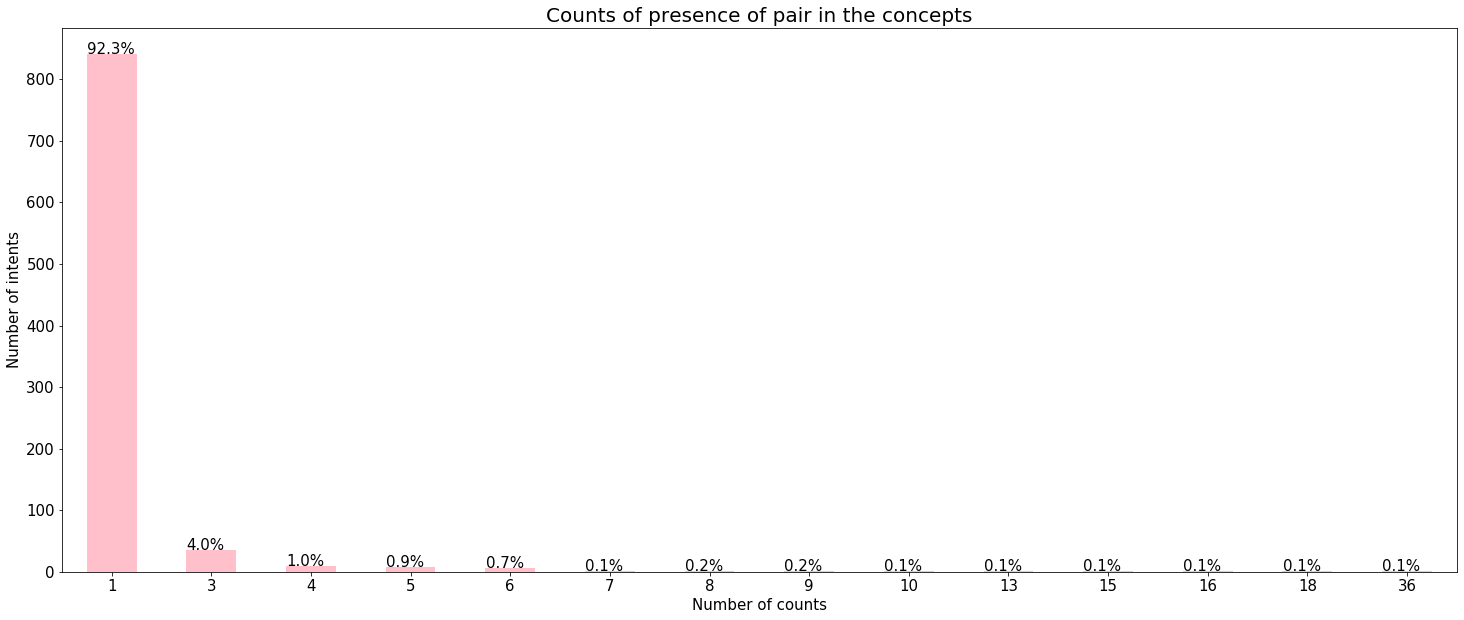

In [21]:
p_dict=dict()
for i in range(1,37):
    p_dict[i] = len(pdf.loc[(pdf['Counts'] == i)])

pdf1=pd.DataFrame.from_dict(p_dict, orient='index',columns=['Counts'])
pdf1 = pdf1[pdf1.Counts != 0]
#pdf1

## visualization
ax=pdf1.plot(kind='bar', color='pink', figsize=(25,10), fontsize=15, legend=False)
plt.xticks(rotation=360)
plt.xlabel('Number of counts', fontsize=15)
plt.ylabel('Number of intents', fontsize=15)
#ax.set_xticklabels(df1['Number_of_intents'].tolist(), rotation = 45, ha="right")
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()/total*100)
    x = p.get_x() + p.get_width()/200
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=15)
    #ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()/), fontsize=12, color='red', ha='center', va='bottom')
    
plt.title('Counts of presence of pair in the concepts', fontsize=20)
plt.savefig('counts_pair_presence_concept.png')

In [22]:
## check which the ranking of pair freq in descending order
#sorted(pair_dict.items(), key=lambda kv: kv[1], reverse=True)

### attribute in pair

In [22]:
## make all attribute list and dictionary
attribute_ls=list(dotDict.keys())
attribute_pair_dict = dict.fromkeys(attribute_ls, 0)

## count dict
pair = re.compile("^\(.*")
a = re.compile("a\d{1,4}")
r = re.compile("r\d{1,4}")
for k,v in Nodes.items():
    for rel in v[6]:
        if pair.match(str(rel)):
            p_str = re.match(r"^\(.*",rel).group(0)
            #print(p_str) # str
            if a.search(p_str):
                aa = a.search(p_str).group(0)             
                attribute_pair_dict[aa] +=1
            if r.search(p_str):
                rr = r.search(p_str).group(0)
                attribute_pair_dict[rr] +=1

zero_ls=list()
for k,v in attribute_pair_dict.items():
    if v == 0:
        zero_ls.append(k)
## which attribute does not have correspondence 
#zero_ls 

## attribute who actually has correspondence
#len(attribute_ls)-len(zero_ls)

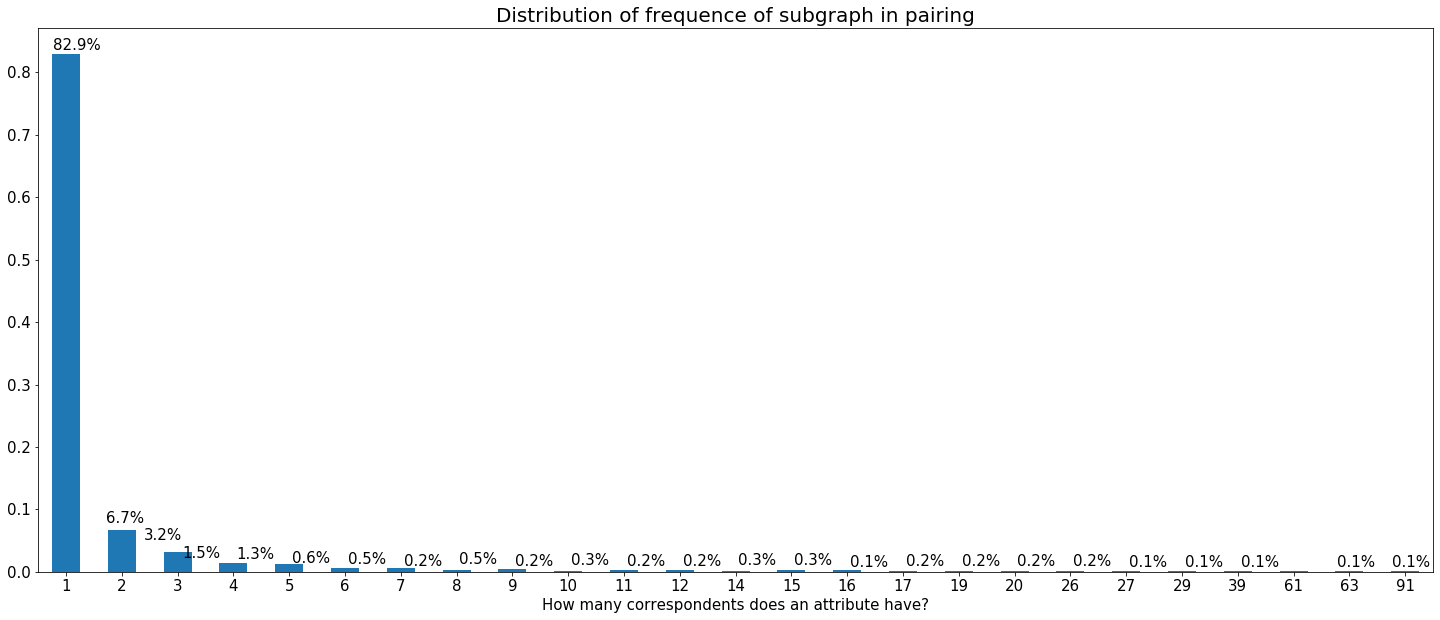

In [23]:
## remove attribute in dict who has 0 correspondence   
attribute_pair_dict={x:y for x,y in attribute_pair_dict.items() if y!=0}
sorted_d = dict(sorted(attribute_pair_dict.items(), key=operator.itemgetter(1),reverse=True))
ar_df=pd.DataFrame.from_dict(sorted_d, orient='index',columns=['Counts'])
#ar_df.describe()

count_num_d=dict()
for i in range(1,92):
    count_num_d[i] = len(ar_df.loc[(ar_df['Counts'] == i)])
ar_df1=pd.DataFrame.from_dict(count_num_d, orient='index',columns=['Counts'])
## remove 0-freq row
ar_df1= ar_df1[(ar_df1.T != 0).any()]
## normalization for percentage representation
ar_df1 = ar_df1['Counts']/ar_df1['Counts'].sum()
#ar_df1

## visualization
ax=ar_df1.plot(kind='bar',  figsize=(25,10), fontsize=15, legend=False)
plt.xticks(rotation=360)
plt.xlabel('How many correspondents does an attribute have?', fontsize=15)
texts = [plt.text(p.get_x() + p.get_width()/200, p.get_height(), '{:.1f}%'.format(p.get_height()*100), fontsize=15) for p in ax.patches if (p.get_height()/total*100) !=0 ]
adjust_text(texts)

plt.title('Distribution of frequence of subgraph in pairing', fontsize=20)
plt.savefig('Distribution_subgraph_freq_pairing.png')

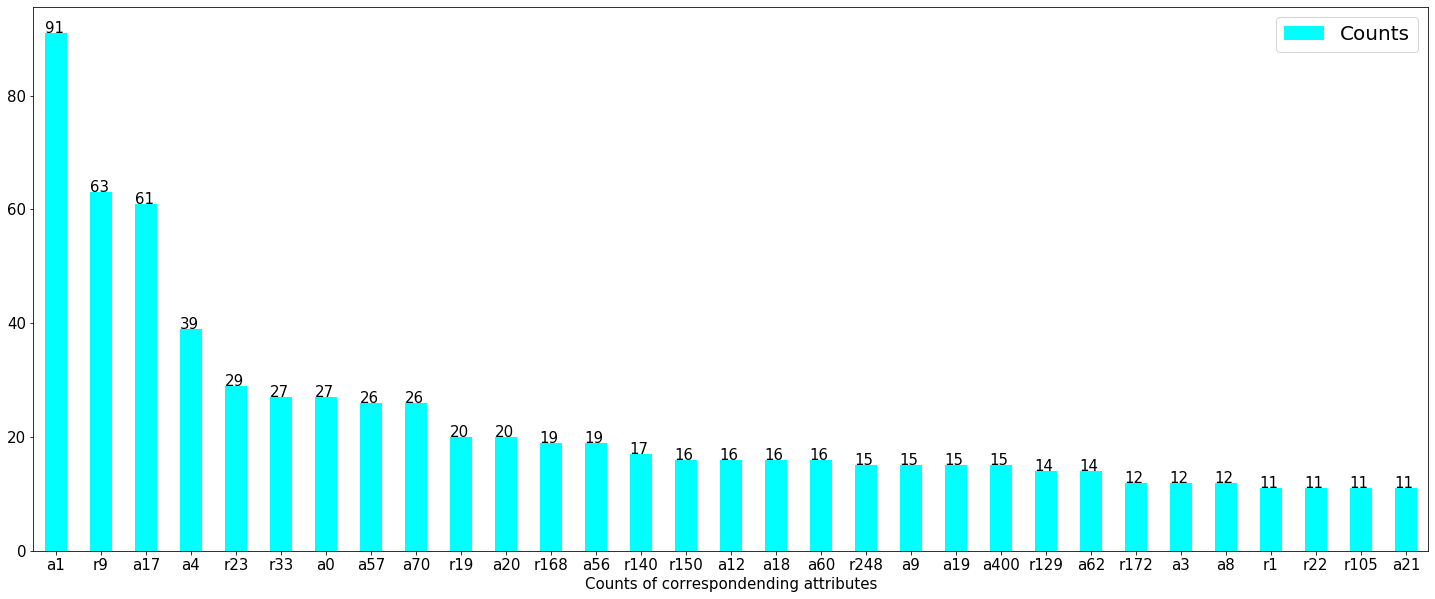

In [24]:
## inspect on attribute who has more than > 10 correspondences
ar_df_10 = ar_df[ar_df['Counts']>10]
## how many attributes are there
#len(ar_df_10)

## visualization
ax=ar_df_10.plot(kind='bar', color='aqua', figsize=(25,10), fontsize=15, legend=True)
plt.xticks(rotation=360)
plt.xlabel('Counts of correspondending attributes', fontsize=15)

for p in ax.patches:
    percentage = '{}'.format(p.get_height())
    x = p.get_x() + p.get_width()/200
    y = p.get_height()
    ax.annotate(percentage, (x, y),fontsize=15)

In [26]:
## check the ranking of attributes who have correspondences in descending order
#dict(sorted(attribute_pair_dict.items(), key=operator.itemgetter(1),reverse=True))